# Parte II: Construcción de un conjunto de datos y exploración de datos

Autor: Christian Torres

Una vez que hayamos recuperado con éxito el conjunto de datos de entrenamiento, podemos comenzar a explorar y comprender el conjunto de datos. El objetivo de este cuaderno será realizar algunas técnicas básicas de análisis de datos sobre los datos y comprender las razones físicas detrás de las características seleccionadas para el modelo.

```{note}
Antes de ejecutar este notebook, asegúrese de que el kernel de Jupyter (esquina superior izquierda del notebook) se haya configurado para funcionar con el entorno que tienen instalada todas las librerías y dependencias.
```


In [8]:
import pandas as pd

## 2.1 Preparación de datos 

Usaremos los datos de la estación meteorológica disponible para usarlos como predictando ($Y$). Recuerda que estos datos pueden ser de más estaciones meteorológicas e incluso se pueden completar con observaciones satelitales.

In [9]:
#df_target= pd.read_csv('../data/temp_aws_entrena.csv', index_col=['Fecha'],parse_dates=['Fecha']).resample('1d').mean()
df_target= pd.read_csv('../data/temp_aws_entrena_utc.csv', index_col=['Datetime'],parse_dates=['Datetime'])#.resample('1d').mean()
df_target


,Temp
Datetime,
2014-01-01 06:00:00,11.200000
2014-01-01 12:00:00,17.150000
2014-01-01 18:00:00,22.366667
2014-01-02 00:00:00,14.716667
2014-01-02 06:00:00,12.950000
...,...
2018-12-11 18:00:00,23.470000
2018-12-12 00:00:00,15.711667
2018-12-12 06:00:00,11.350000


Ahora leemos la matriz de características ($X$) (los datos de ERA5) y la fusionamos con la respuesta objetivo ($Y$, los datos de temperatura observados).

In [10]:
#df_features = pd.read_csv('../data/ERA5_all.csv',  index_col=['Datetime'],parse_dates=['Datetime']).resample('1d').mean()
df_features = pd.read_csv('../data/ERA5_all_UTC.csv',  index_col=['time'],parse_dates=['time'])#.resample('1d').mean()

df_features


,t2m,z,tp,g_1000,t_1000,g_500,t_500,g_200,t_200
time,,,,,,,,,
2014-01-01 00:00:00,280.64580,37063.72,1.158565e-05,0.008835,297.13602,0.003417,268.61072,0.000093,220.89581
2014-01-01 06:00:00,277.90180,37063.72,0.000000e+00,0.007724,296.93036,0.002321,267.87152,0.000031,221.52385
2014-01-01 12:00:00,279.36935,37063.72,0.000000e+00,0.007367,297.06238,0.002287,268.74133,0.000030,221.22790
2014-01-01 18:00:00,285.01968,37063.72,7.392447e-04,0.008523,297.13602,0.003990,268.28558,0.000041,221.73782
2014-01-02 00:00:00,279.97020,37063.72,1.873057e-04,0.008609,297.24298,0.003992,269.07202,0.000092,222.62428
...,...,...,...,...,...,...,...,...,...
2018-12-30 18:00:00,287.09253,37063.72,3.051260e-04,0.009952,296.72977,0.003633,267.87646,0.000052,220.12949
2018-12-31 00:00:00,281.84280,37063.72,4.348811e-05,0.008959,297.08740,0.002240,268.99410,0.000069,220.17279
2018-12-31 06:00:00,278.87656,37063.72,4.726462e-07,0.008518,296.97705,0.001803,269.01227,0.000060,219.33736


In [11]:
df_all = pd.merge(df_features, df_target, how='left', left_index=True, right_index=True).dropna()
df_all

,t2m,z,tp,g_1000,t_1000,g_500,t_500,g_200,t_200,Temp
time,,,,,,,,,,
2014-01-01 06:00:00,277.90180,37063.72,0.000000,0.007724,296.93036,0.002321,267.87152,0.000031,221.52385,11.200000
2014-01-01 12:00:00,279.36935,37063.72,0.000000,0.007367,297.06238,0.002287,268.74133,0.000030,221.22790,17.150000
2014-01-01 18:00:00,285.01968,37063.72,0.000739,0.008523,297.13602,0.003990,268.28558,0.000041,221.73782,22.366667
2014-01-02 00:00:00,279.97020,37063.72,0.000187,0.008609,297.24298,0.003992,269.07202,0.000092,222.62428,14.716667
2014-01-02 06:00:00,278.92530,37063.72,0.000007,0.008257,296.93176,0.003964,268.45926,0.000030,222.50063,12.950000
...,...,...,...,...,...,...,...,...,...,...
2018-12-11 18:00:00,283.42606,37063.72,0.001960,0.009002,296.80660,0.003822,267.47552,0.000086,219.55948,23.470000
2018-12-12 00:00:00,281.88910,37063.72,0.000050,0.007484,297.16144,0.003705,267.70605,0.000075,219.33456,15.711667
2018-12-12 06:00:00,279.94855,37063.72,0.000060,0.007501,296.70740,0.003792,266.72250,0.000071,218.78412,11.350000


In [12]:
df_all.to_csv('../data/df_all.csv')

Ahora que tenemos un DataFrame con el conjunto de datos completo, incluida la matriz de características ($X$) y los datos de temperatura de destino ($Y$), podemos guardarlo en un archivo para usarlo más adelante.

## 2.2 Estadísticas preliminares del conjunto de datos 

En esta sección, explicaremos el conjunto de datos que tenemos para comprender mejor los datos que utilizaremos en nuestros modelos. 


Una simple mirada a la distribución de la temperatura muestra que la mayoría de las temperaturas de la estación meteorológica esta entre 15 y 18 °C.


<AxesSubplot:>

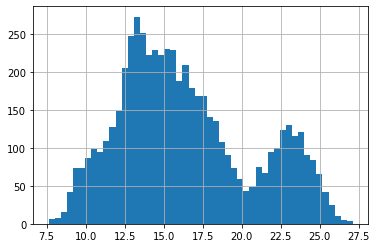

In [13]:
df_all['Temp'].hist(bins=50)

### [ **Ejercicio 1** ]
<img src="img/eye_logo.png" width="75"/>

¿Qué otros tipos de análisis de datos se te ocurren? Implícalos en esta sección trazando diferentes gráficos y estadísticas.

## 2.3 Cómo construir un buen conjunto de datos

En esta sección, analizaremos cómo crear correctamente un buen conjunto de datos de entrenamiento para asegurarnos de que los modelos puedan representar correctamente los procesos físicos que nos interesan.

Ahora que tenemos el conjunto de datos listo, echemos un vistazo a las características:

In [14]:
df_all.columns

Index(['t2m', 'z', 'tp', 'g_1000', 't_1000', 'g_500', 't_500', 'g_200',
       't_200', 'Temp'],
      dtype='object')

En este conjunto de datos ya hemos seleccionado una selección de características de entrenamiento para usted. No obstante, en un proyecto de investigación, este paso no debe darse por sentado, ya que puede tener un gran impacto en el diseño del modelo.

### 2.3.1 Selección de funciones informada

La primera pregunta que debemos hacernos es: _¿qué variables afectan al proceso físico que estamos tratando de modelar?_ En este caso, estamos hablando de la **temperatura del aire a 2 metros**. 
La teoría nos dice que la temperatura se ve afectada por la circulación sinóptica y los procesos locales. Por ejemplo, sistemas ciclónicos y anticiclónicos atmosféricos pueden modificar la temperatura. El transporte de masas de aire desde regiones distantes también cambian la temperatura. Dentro de los procesos locales podemos encontrar el cambio de la cobertura del suelo, la precipitación y topografía local.

- En la figura 1 ([Sulca el at., 2018](https://doi.org/10.1002/qj.3398)) podemos ver anomalías de la circulación atmosférica regional. Durante estas anomalías la temperatura en el valle del Mantaro descendió y fue considerando eventos de frío intenso.

<img src="img/Screenshot at 2024-08-02 15-54-37.png" class="center" width="700"/>

*Figura 1. Representa las anomalías de circulación atmosférica regional. Tomado desde [Sulca el at., (2018).](https://doi.org/10.1002/qj.3398)*


- En la figura 2 podemos ver procesos locales de circulación valle-montaña. Por el día, las partes altas son más calientes, lo que hace que el flujo de aire sea de valle para montaña. Mientras que por las noches, el valle hace más frío y el flujo de aire es de montaña para valle. Durante un dia mas soleado este gradiente aumenta por lo tanto la circulación local se hace mas fuerte impactando la temperatura.

<img src="img/Screenshot at 2024-08-02 16-06-35.png" class="center" width="400"/>

*Figura 2. Circulación local valle-montaña.*

### 2.3.2 Elegir los datos correctos y comprender las implicaciones en el diseño del modelo

La siguiente pregunta al crear un conjunto de datos sería: _¿a qué datos disponibles en las escalas espaciales y temporales que estamos tratando de modelar puedo acceder?_

Lo ideal sería tener siempre un conjunto de datos espacio-temporales densos que cubren todas las dinámicas posibles en el proceso físico que queremos modelar. Sin embargo, lamentablemente en la realidad esto (casi) nunca es posible. Suelen estar presentes dos limitaciones principales: 

- **La resolución espacial y temporal del conjunto de datos es demasiado baja.** El conjunto de datos puede ser rico en una de las dos dimensiones, por ejemplo, una gran cobertura espacial, pero tiene una resolución temporal baja (por ejemplo, una resolución multianual). Al usar dichos datos para entrenar el modelo, debemos tener en cuenta el impacto en las capacidades y el rendimiento del modelo. Entrenar un modelo con dichos datos restringirá sus capacidades de predicción a resoluciones espacio-temporales similares a las que ha visto durante el entrenamiento. 


- **La cobertura espacio-temporal de los datos.** Incluso si los datos tienen la resolución espacio-temporal correcta, normalmente solo cubren parte del dominio temporal y espacial que queremos modelar. Este suele ser el caso de los problemas de reconstrucción, en los que le pedimos al modelo que _llene los espacios vacíos_ en el conjunto de datos. Para tales casos, debemos tener en cuenta qué tipo de cobertura de datos tenemos y qué tipo de instancias o rangos de datos podrían faltar en el conjunto de datos. Esto determinará las capacidades del modelo en términos de predicción y generalización. Cuanto más variabilidad y dinámica haya en el conjunto de datos, más posibilidades tendremos de construir un buen modelo. Para los casos en los que faltan partes importantes de la dinámica, agregar restricciones físicas (por ejemplo, utilizando **Physics-informed neural networks** o ecuaciones diferenciales universales) es una buena forma de superar esto. Las restricciones físicas pueden ayudar a guiar el aprendizaje, reduciendo la necesidad de conjuntos de datos más grandes y completos.


En la figura 3 se muestran los mapas del Perú con estaciones meteorológicas disponibles. 

**Responda:**

- ¿Existe una buena cobertura de las estaciones meteorológicas en la amazonia? 

- ¿Se pueden usar estas informaciones para entrenar algoritmos de inteligencia artificial para reconstruir la temperatura o precipitación?


<img src="img/Screenshot at 2024-08-02 16-26-55.png" class="center" width="700"/>

Figura 3. Estaciones meteorológicas en Perú. Fuente [Huerta et al. (2022).](https://doi.org/10.1016/j.dib.2022.108570)